In [140]:
## for data
import numpy as np
import pandas as pd
## for plotting
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import plotly.express as px
## for geospatial
from geopy.geocoders import Nominatim
## for outilier and ##for clustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

In [184]:
geolocation = pd.read_csv(r'C:\Users\luisf\OneDrive\Documentos\Projetos Portifólio\E-commerce Brazil\olist_geolocation_dataset.csv')

In [185]:
filter = "MT"
state = geolocation[geolocation["geolocation_state"]==filter][["geolocation_zip_code_prefix","geolocation_city","geolocation_state","geolocation_lng","geolocation_lat"]].reset_index(drop=True)

In [186]:
anomaly = DBSCAN(eps=1.5, min_samples=5).fit(state[['geolocation_lng','geolocation_lat']])

In [187]:
state['anomaly'] = anomaly.labels_

In [188]:
fig = px.scatter(state, x="geolocation_lng", y="geolocation_lat", color="anomaly", labels={"anomaly": "anomaly"})
fig.show()

In [189]:
state = state[state['anomaly'] == 0]

In [190]:
clean = state.copy()

In [191]:
state['geolocation_city'] = state['geolocation_city'].map(lambda x: x.lower()).str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [192]:
state['sales'] = state['geolocation_city'].map(geolocation['geolocation_city'].value_counts())

In [193]:
state.drop_duplicates(subset=['geolocation_city'], inplace= True)

In [196]:
geolocator = Nominatim(user_agent = 'your_app_name')
geolocator.geocode("mato grosso")

Location(Mato Grosso, Região Centro-Oeste, Brasil, (-12.2115009, -55.5716547, 0.0))

In [197]:
fig = px.density_mapbox(state, lat='geolocation_lat', lon='geolocation_lng', z='sales', radius=50,
                        center=dict(lat=-12.2115009, lon=-55.5716547), zoom=4.5,
                        mapbox_style="open-street-map")

In [198]:
fig.show()

In [199]:
coord = clean[['geolocation_lng','geolocation_lat']]

In [203]:
clustering = DBSCAN(eps=0.6, min_samples=5).fit(coord)

In [204]:
clean['clusters'] = clustering.labels_

In [205]:
fig = px.scatter_mapbox(clean, lat="geolocation_lat", lon="geolocation_lng", color="clusters",
                        hover_name="geolocation_city", zoom=4,
                        width=1000, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [206]:
clustering2 = DBSCAN(eps=1.2, min_samples=5).fit(coord)

In [207]:
clean['clusters2'] = clustering2.labels_

In [208]:
fig = px.scatter_mapbox(clean, lat="geolocation_lat", lon="geolocation_lng", color="clusters2",
                        hover_name="geolocation_city", zoom=4,
                        width=1000, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [213]:
clust = OPTICS(min_samples=50, xi=.02, min_cluster_size=.05)

In [214]:
clust.fit(coord)

OPTICS(min_cluster_size=0.05, min_samples=50, xi=0.02)

In [215]:
clean['clusters_opt'] = clust.labels_

In [216]:
fig = px.scatter_mapbox(clean, lat="geolocation_lat", lon="geolocation_lng", color="clusters_opt",
                        hover_name="geolocation_city", zoom=4,
                        width=1000, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

Text(0.5, 1.0, 'Reachability Plot')

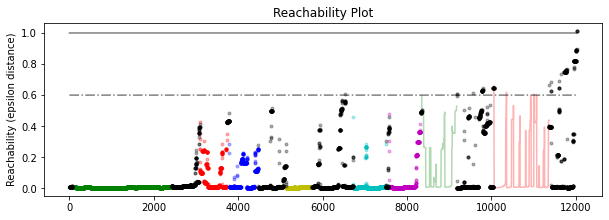

In [217]:
space = np.arange(len(coord))
labels = clust.labels_[clust.ordering_]
reachability = clust.reachability_[clust.ordering_]
plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
colors = ['g.', 'r.', 'b.', 'y.', 'c.', 'm.', 'green', 'red']
for klass, color in zip(range(0, 9), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 1., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.6, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')